## ML 2020 Ex3 Group 38 jupyter notebook

In [1]:
# run this to create train/test data split from raw data
# %run "prepare.py" 7 3

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport networks
%aimport modules
%aimport modules_DAE
%aimport utils

In [4]:
from networks import SoftMax, MLP, DAELayer, DAESoftMax, ConvNet
from modules import buildModel, invert
from modules_DAE import buildDAELayer, buildDAESoftmaxModel, evaluateModel_DAE

In [5]:
# train first dae layer

buildDAELayer(DAELayer(1000), 1e-5, 5000, True, True)

Starting at 10:17:56 to build DAE_1000 model...
Epoch: 1/5000..  Training Loss: 0.226..  Validate Loss: 0.207.. 
Validation loss decreased (inf --> 0.010343). Saving model ...
Epoch: 2/5000..  Training Loss: 0.191..  Validate Loss: 0.173.. 
Validation loss decreased (0.010343 --> 0.008647). Saving model ...
Epoch: 3/5000..  Training Loss: 0.154..  Validate Loss: 0.134.. 
Validation loss decreased (0.008647 --> 0.006688). Saving model ...
Epoch: 4/5000..  Training Loss: 0.115..  Validate Loss: 0.097.. 
Validation loss decreased (0.006688 --> 0.004858). Saving model ...
Epoch: 5/5000..  Training Loss: 0.081..  Validate Loss: 0.069.. 
Validation loss decreased (0.004858 --> 0.003436). Saving model ...
Epoch: 6/5000..  Training Loss: 0.057..  Validate Loss: 0.049.. 
Validation loss decreased (0.003436 --> 0.002458). Saving model ...
Epoch: 7/5000..  Training Loss: 0.042..  Validate Loss: 0.038.. 
Validation loss decreased (0.002458 --> 0.001885). Saving model ...
Epoch: 8/5000..  Training 

KeyboardInterrupt: 

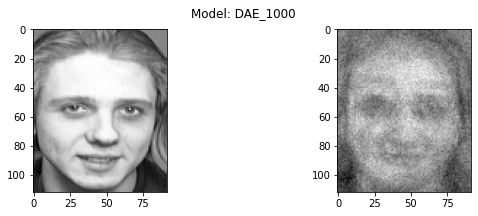

In [11]:
# evaluate outcome of first dae layer (needs a model in ./models/DAE_1000_model.pt)

layer_1 = DAELayer(1000)

evaluateModel_DAE(layer_1, 3)

Starting at 14:12:15 to build DAE_300 model...
Epoch: 1/1000..  Training Loss: 0.286..  Validate Loss: 0.234.. 
Validation loss decreased (inf --> 0.011684). Saving model ...
Epoch: 2/1000..  Training Loss: 0.275..  Validate Loss: 0.228.. 
Validation loss decreased (0.011684 --> 0.011408). Saving model ...
Epoch: 3/1000..  Training Loss: 0.267..  Validate Loss: 0.221.. 
Validation loss decreased (0.011408 --> 0.011073). Saving model ...
Epoch: 4/1000..  Training Loss: 0.257..  Validate Loss: 0.213.. 
Validation loss decreased (0.011073 --> 0.010672). Saving model ...
Epoch: 5/1000..  Training Loss: 0.245..  Validate Loss: 0.204.. 
Validation loss decreased (0.010672 --> 0.010192). Saving model ...
Epoch: 6/1000..  Training Loss: 0.230..  Validate Loss: 0.192.. 
Validation loss decreased (0.010192 --> 0.009613). Saving model ...
Epoch: 7/1000..  Training Loss: 0.214..  Validate Loss: 0.180.. 
Validation loss decreased (0.009613 --> 0.008980). Saving model ...
Epoch: 8/1000..  Training L

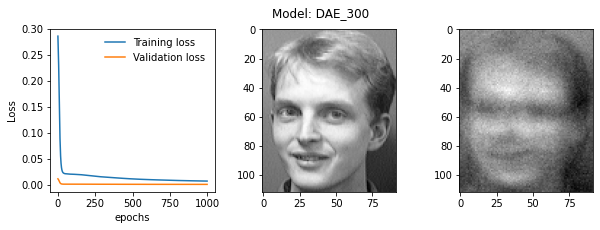

In [11]:
# train second dae layer with dae1000 preprocessed imgs

buildDAELayer(DAELayer(300), 1e-5, 1000, True, True)

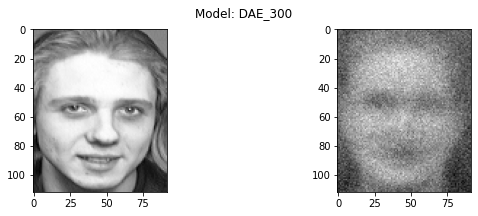

In [12]:
# evaluate outcome of second dae layer (needs a model in ./models/DAE_300_model.pt)

layer_2 = DAELayer(300)

evaluateModel_DAE(layer_2, 3)

Starting at 16:09:24 to build SoftMax model...
Epoch: 1/500..  Training Loss: 4.971..  Validate Loss: 3.963..  Accuracy: 0.025
Validation loss decreased (inf --> 0.198147). Saving model ...
Epoch: 2/500..  Training Loss: 4.986..  Validate Loss: 4.984..  Accuracy: 0.025
Epoch: 3/500..  Training Loss: 5.348..  Validate Loss: 4.825..  Accuracy: 0.025
Epoch: 4/500..  Training Loss: 4.987..  Validate Loss: 3.969..  Accuracy: 0.250
Epoch: 5/500..  Training Loss: 4.840..  Validate Loss: 4.866..  Accuracy: 0.075
Epoch: 6/500..  Training Loss: 5.273..  Validate Loss: 4.301..  Accuracy: 0.100
Epoch: 7/500..  Training Loss: 3.954..  Validate Loss: 3.773..  Accuracy: 0.133
Validation loss decreased (0.198147 --> 0.188673). Saving model ...
Epoch: 8/500..  Training Loss: 3.299..  Validate Loss: 3.189..  Accuracy: 0.192
Validation loss decreased (0.188673 --> 0.159463). Saving model ...
Epoch: 9/500..  Training Loss: 3.523..  Validate Loss: 3.364..  Accuracy: 0.250
Epoch: 10/500..  Training Loss: 3.

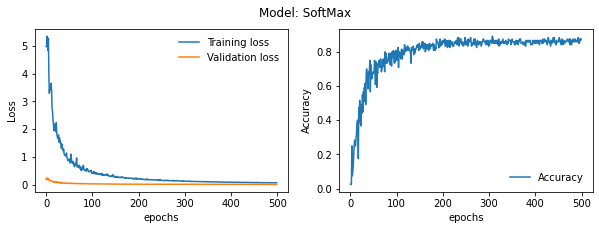

In [5]:
# train softmax with dae1000 and dae300 preprocessed imgs

buildDAESoftmaxModel(DAESoftMax(), lRate=1e-2, epochs=500, plot=True, verbose=True)

Starting at 16:30:07 to invert SoftMax...
Finished at 16:30:12, duration in sec: 5


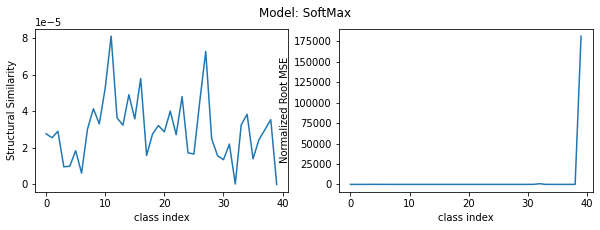

SSM: mean 2.99e-05, std 1.72e-05
NRMSE: mean 4.57e+03, std 2.83e+04


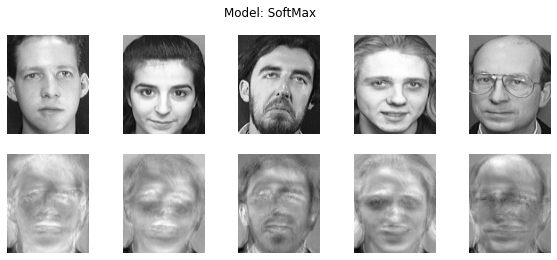

In [6]:
# invert softmax model

invert(DAESoftMax(), lrMod=0.001, lrInv=0.001, nStep=50, plot=True)

Starting at 16:32:02 to build SoftMax model...
Finished at 16:32:14, duration in sec: 12


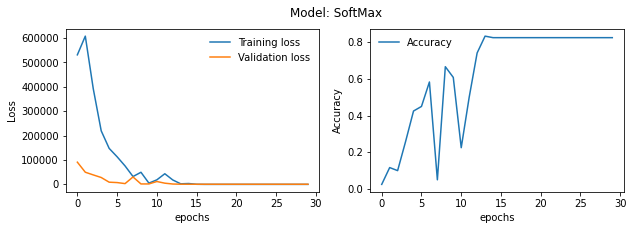

In [8]:
buildModel(SoftMax(), lRate=0.01, epochs=30, plot=True)

Starting at 17:35:32 to invert SoftMax...
Finished at 17:35:37, duration in sec: 5


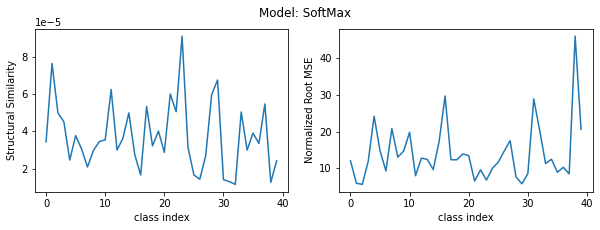

SSM: mean 3.74e-05, std 1.82e-05
NRMSE: mean 1.40e+01, std 7.75e+00


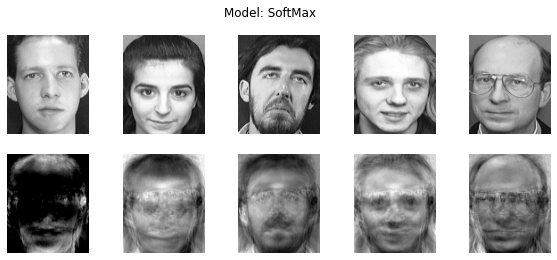

In [12]:
invert(SoftMax(), lrMod=0.001, lrInv=0.001, nStep=50, plot=True)

Starting at 16:32:20 to build MLP model...
epoch: 100
epoch: 200
epoch: 300
epoch: 400
epoch: 500
Finished at 17:34:41, duration in sec: 3740


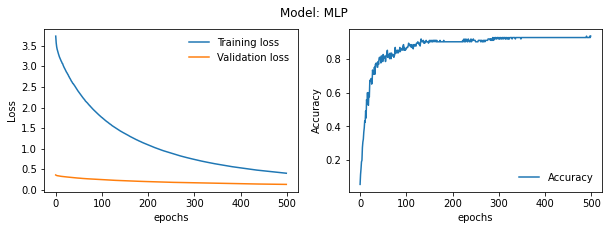

In [10]:
buildModel(MLP(), 0.0001, 500, True)

Starting at 17:35:43 to invert MLP...
Finished at 17:37:53, duration in sec: 130


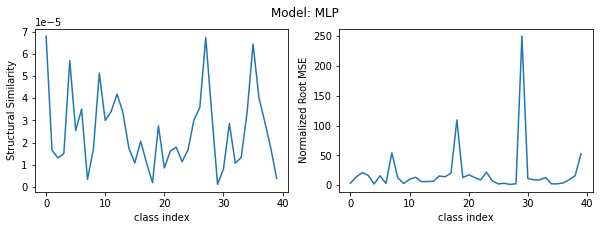

SSM: mean 2.55e-05, std 1.76e-05
NRMSE: mean 2.06e+01, std 4.12e+01


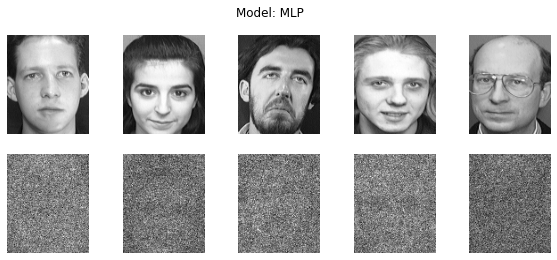

In [13]:
invert(MLP(), 0.0001, 0.01, 20, plot=True)

Starting at 17:37:55 to build ConvNet model...
Finished at 17:41:35, duration in sec: 220


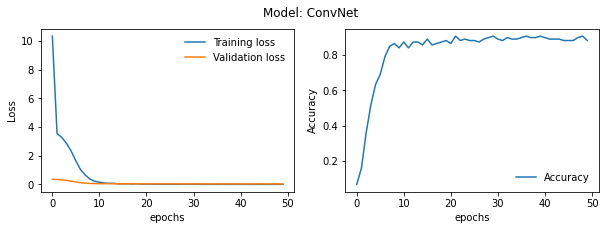

In [14]:
buildModel(ConvNet(), 0.001, 50, True)

Starting at 17:41:36 to invert ConvNet...
Finished at 17:43:01, duration in sec: 85


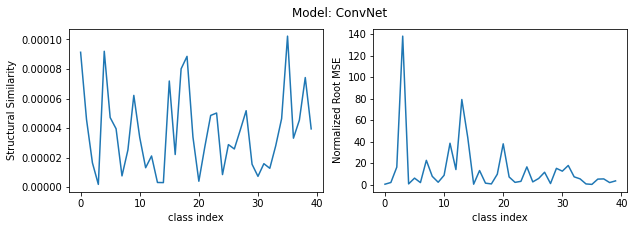

SSM: mean 3.76e-05, std 2.72e-05
NRMSE: mean 1.43e+01, std 2.49e+01


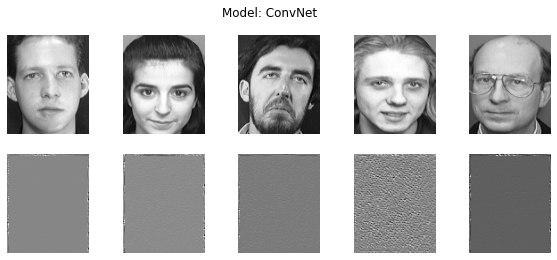

In [15]:
invert(ConvNet(), 0.01, 0.01, 50, plot=True)